In [2]:
import numpy as np
import growth_simulations as g
import os
import scipy
import time
# import seaborn as sns
import weakref
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
# sns.set_style("whitegrid")

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
# # Setting simulation parameters
l = np.array([1.0])
td_std = np.array([0.0])  # 1
lambda_std = np.linspace(0.0, 0.2, num=3)  # 3
delta = np.array([1.0])
beta = np.linspace(0.025, 0.5, num=20)  # 20
r = beta/(1-beta)
alpha = np.linspace(0.0, 1.0, num=6)  # 6
x=1-2*beta
num_rep = 100  # number of repeats
# # should give 36000 repeats. Run with 1000 job array.
# # should take around 6 hours. 600min.50574953

par_vals = {'nstep': 900, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 7, 'delta': delta[0], 'lambda': l[0]}
X = [len(td_std), len(lambda_std), len(beta), len(alpha), num_rep]

In [6]:
data=np.load('./output_compiled.npy')
print data.shape

(1, 3, 20, 6, 100, 3, 10)


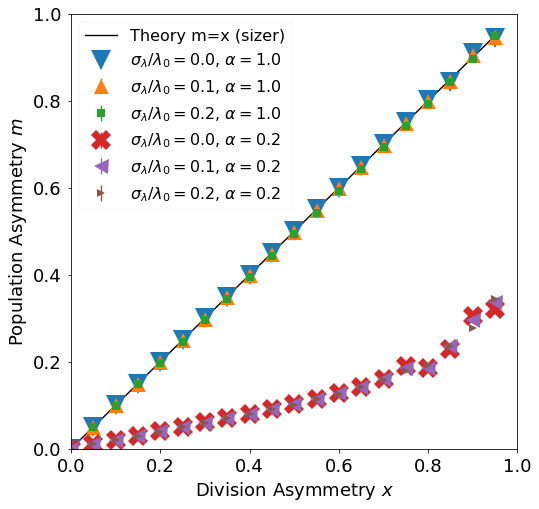

In [13]:
fig=plt.figure(figsize=[8,8])
ax=plt.subplot(1,1,1)
# sns.set(font_scale=2)
plt.style.use('seaborn-paper')
i0=0
i1=1
ind_beta_start=0
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
inds=[0,1,2,0,1,2]
inds1=[0,0,0,0,0,0]
inds2 = [5,5,5,1,1,1]
lws = [8.0,8.0,8.0,8.0]
style=['-','--','-.',':']
markers=['v','^','s','X','<','>','o']
sizes=[20,15,8,20,15,8]
for temp in range(len(inds)):
    ind=inds1[temp]
    ind1=inds[temp]
    ind2=inds2[temp]
    yv=np.mean(data[ind,ind1,ind_beta_start:,ind2,:,2,9],axis=1)
    ystd=np.std(data[ind,ind1,ind_beta_start:,ind2,:,2,9],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$\sigma_\lambda/\lambda_0={0}$, $\alpha={1}$'.format(lambda_std[ind1],alpha[ind2]),linestyle='None',marker=markers[temp],markersize=sizes[temp],capsize=7)
#     plt.fill_between(xv,yv-ystd/np.sqrt(num_rep),yv+ystd/np.sqrt(num_rep),alpha=0.3)
plt.gca().set_prop_cycle(None)
plt.xlabel(r'Division Asymmetry $x$')
# plt.xlim(xmin=0)
plt.xlim(xmin=0,xmax=1)
plt.ylim(ymin=0,ymax=1)
xv=np.linspace(x[0],x[-1],100)
plt.plot(xv,xv,label='Theory m=x (sizer)',color='k')
plt.ylabel(r'Population Asymmetry $m$')
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(loc=0,prop={'size': 16})
# plt.legend(loc=0)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/asymmetry_m/sizer.eps',dpi=300,bbox_inches='tight')

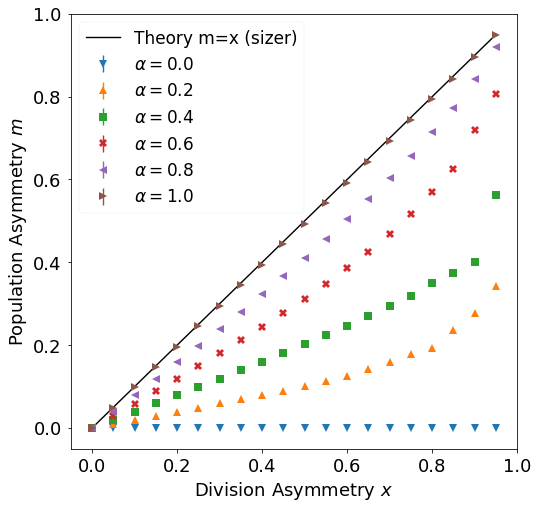

In [7]:
fig=plt.figure(figsize=[8,8])
ax=plt.subplot(1,1,1)
# sns.set(font_scale=2)
plt.style.use('seaborn-paper')
i0=0
i1=1
ind_beta_start=0
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
inds=[2]
inds1=[0]
lws = [8.0,8.0,8.0,8.0]
style=['-','--','-.',':']
markers=['v','^','s','X','<','>','o']
sizes=[8,5,5,5]
for ind2 in range(len(alpha)):
    for temp in range(len(inds)):
        ind=inds1[temp]
        ind1=inds[temp]
        yv=np.mean(data[ind,ind1,ind_beta_start:,ind2,:,2,9],axis=1)
        ystd=np.std(data[ind,ind1,ind_beta_start:,ind2,:,2,9],axis=1)
        plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$\alpha={0}$'.format(alpha[ind2]),linestyle='None',marker=markers[ind2],markersize=8,capsize=7)
#     plt.fill_between(xv,yv-ystd/np.sqrt(num_rep),yv+ystd/np.sqrt(num_rep),alpha=0.3)
plt.gca().set_prop_cycle(None)
plt.xlabel(r'Division Asymmetry $x$')
# plt.xlim(xmin=0)
plt.xlim(xmin=-0.05,xmax=1)
plt.ylim(ymin=-0.05,ymax=1)
xv=np.linspace(x[0],x[-1],100)
plt.plot(xv,xv,label='Theory m=x (sizer)',color='k')
plt.ylabel(r'Population Asymmetry $m$')
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(loc=0,prop={'size': 17})
# plt.legend(loc=0)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/asymmetry_m/var_alpha.eps',dpi=300,bbox_inches='tight')